In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#example dataset given by eaze
data = pd.read_csv("hourly_volume.csv")

In [3]:
data.head()

,order_hour,num_orders
0,2016-07-04 00:00:00,0
1,2016-07-04 01:00:00,0
2,2016-07-04 02:00:00,0
3,2016-07-04 03:00:00,0
4,2016-07-04 04:00:00,0


In [4]:
len(data)

1200

In [5]:
#check if there's missing value
#there isn't
data[data['num_orders'].isnull() == True]

,order_hour,num_orders


In [6]:
#or
data.isnull().sum()

order_hour    0
num_orders    0
dtype: int64

In [ ]:
#if there are missing values,
#very first approach
#remove missing value rows
data = data.dropna()

In [7]:
#parse strings to datetime type
data['order_hour'] = pd.to_datetime(data['order_hour'], infer_datetime_format=True)

In [8]:
data.head()

,order_hour,num_orders
0,2016-07-04 00:00:00,0
1,2016-07-04 01:00:00,0
2,2016-07-04 02:00:00,0
3,2016-07-04 03:00:00,0
4,2016-07-04 04:00:00,0


In [9]:
data = data.set_index(['order_hour'])

In [10]:
data.head()

,num_orders
order_hour,
2016-07-04 00:00:00,0
2016-07-04 01:00:00,0
2016-07-04 02:00:00,0
2016-07-04 03:00:00,0
2016-07-04 04:00:00,0


In [11]:
#code for slicing dates
len(data['2016-07-08':'2016-07-15'])

192

/nfs/2017/t/thomkim/JupyterNotebook/env/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


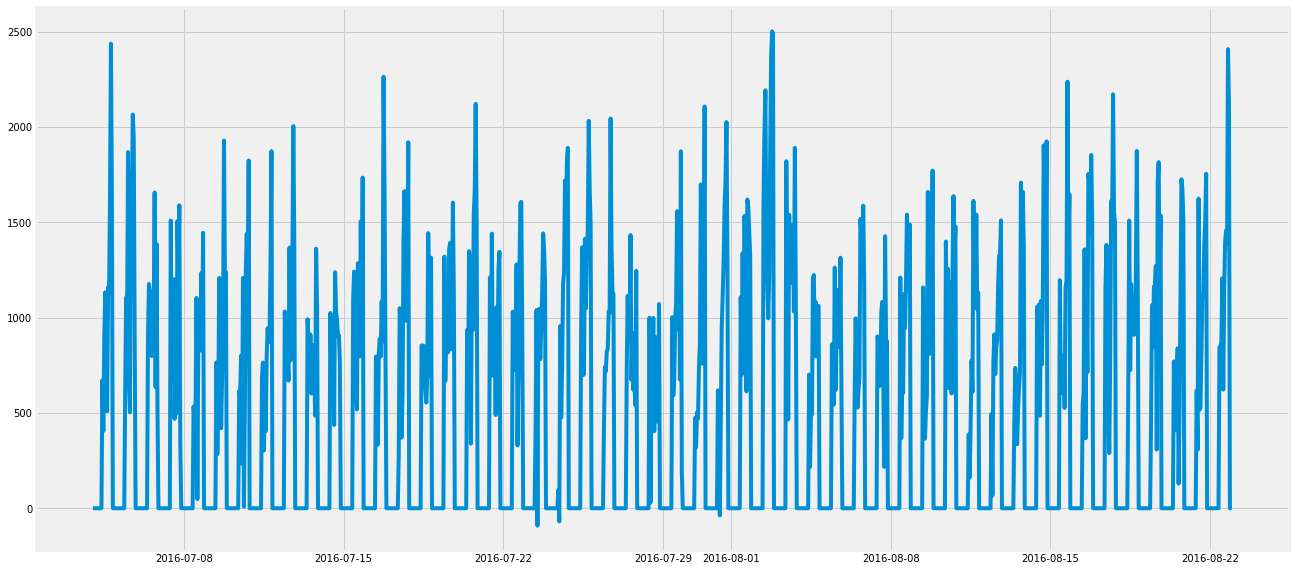

In [12]:
plt.figure(figsize=(20,10))
plt.plot(data)

In [13]:
#finding parameters for ARIMA
#define p,d,q to take any values between 0,2 (exclusive to 2)
p = d = q = range(0,3)

In [14]:
#generate all difference combinations of p,d,q triplets
pdq = list(itertools.product(p,d,q))

In [15]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [16]:
#generate all difference combinations of seasonal p,d,q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [17]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [18]:
#grid search - automation of finding parameters
aic = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            aic.append([param, param_seasonal, results.aic])
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:19337.944215074727
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:19155.977201549438
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:18133.460969675547
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:19960.894323156077
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:18310.531376605526
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:17636.48061740813
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:21353.460580714454
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:19594.466194444318
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:18024.902196672883
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:19172.468181033466
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:18678.64474756887
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:18230.007295838328
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:17050.254296274423
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:17034.87924085231
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:16396.115537888327
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:17696.04717204716
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:16930.42180050451
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:16749.4976961063

ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:16991.21973333759
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:16364.615279529535
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:17682.570698926647
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:16888.364765448307
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:16710.59828252572
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:16897.824567965305
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:16868.85615000292
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:16859.876149698553
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:16868.13510265165
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:16627.888958466196
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:17106.023093425898
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:17382.240384332945
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:16751.348962626213
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:18017.33946189843
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:19230.077926858787
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:19027.158299013958
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:18697.537354094395
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:19631.2238868083

ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:18516.660102293346
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:18008.186074432757
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:17834.44423386277
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:17336.183136365817
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:18652.862376428428
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:17337.629868708045
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:17024.333746707467
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:19935.659847638803
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:18317.43874966425
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:17082.570046637928
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:17859.230658656816
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:17304.98743145183
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:17092.54664616396
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:17011.614214907182
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:16996.102900898426
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:16454.769989771856
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:17639.572990233704
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:16876.406694288

ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:17322.423819710166
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:17202.72167077524
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:16613.96484780698
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:17994.287284223126
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:17198.044828780796
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:16969.756189207743
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:17171.570937410146
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:17367.391363740415
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:16908.959276173293
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:17141.316731089657
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:17561.97804001902
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:16707.983029732568
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:17682.36335632386
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:17036.895648051875
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:18888.541324107777
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:18083.235472922475
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:17815.677343477026
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:17375.111966804

ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:16926.213633633663
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:17884.225907642092
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:17952.65248351639
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:17769.929909898376
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:17264.32957251303
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:18747.797149958093
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:17474.615258495076
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:17618.842768051174
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:19997.21609411321
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:18414.11827963146
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:18661.810708776167
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:17745.226120185434
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:17330.084382807447
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:16958.586985028902
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:17122.757659808958
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:17015.161563364156
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:17457.825234870066
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:17648.673655587

In [19]:
aic

[[(0, 0, 0), (0, 0, 0, 12), 19337.944215074727],
 [(0, 0, 0), (0, 0, 1, 12), 19155.977201549438],
 [(0, 0, 0), (0, 0, 2, 12), 18133.460969675547],
 [(0, 0, 0), (0, 1, 0, 12), 19960.894323156077],
 [(0, 0, 0), (0, 1, 1, 12), 18310.531376605526],
 [(0, 0, 0), (0, 1, 2, 12), 17636.48061740813],
 [(0, 0, 0), (0, 2, 0, 12), 21353.460580714454],
 [(0, 0, 0), (0, 2, 1, 12), 19594.466194444318],
 [(0, 0, 0), (0, 2, 2, 12), 18024.902196672883],
 [(0, 0, 0), (1, 0, 0, 12), 19172.468181033466],
 [(0, 0, 0), (1, 0, 1, 12), 18678.64474756887],
 [(0, 0, 0), (1, 0, 2, 12), 18230.007295838328],
 [(0, 0, 0), (1, 1, 0, 12), 17050.254296274423],
 [(0, 0, 0), (1, 1, 1, 12), 17034.87924085231],
 [(0, 0, 0), (1, 1, 2, 12), 16396.115537888327],
 [(0, 0, 0), (1, 2, 0, 12), 17696.04717204716],
 [(0, 0, 0), (1, 2, 1, 12), 16930.42180050451],
 [(0, 0, 0), (1, 2, 2, 12), 16749.497696106362],
 [(0, 0, 0), (2, 0, 0, 12), 17023.20050835459],
 [(0, 0, 0), (2, 0, 1, 12), 17025.22471779488],
 [(0, 0, 0), (2, 0, 2, 12),

In [20]:
gen = (x for x in aic)

In [21]:
min(x[2] for x in gen)

16298.019460822165

In [22]:
#finding the best parameters
gen = (x for x in aic)
from operator import itemgetter
p=min(gen, key=itemgetter(2))
p

[(0, 0, 2), (1, 1, 2, 12), 16298.019460822165]

In [23]:
p

[(0, 0, 2), (1, 1, 2, 12), 16298.019460822165]

In [24]:
print(p[0])
print(p[1])

(0, 0, 2)
(1, 1, 2, 12)


In [25]:
#use the best (lowest AIC) parameters
#to fit the ARIMA time series model
mod = sm.tsa.statespace.SARIMAX(data,
                                order=p[0],
                                seasonal_order=p[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1352      0.019      7.026      0.000       0.097       0.173
ma.L2          0.1257      0.021      5.892      0.000       0.084       0.168
ar.S.L12      -1.0013      0.001  -1502.415      0.000      -1.003      -1.000
ma.S.L12      -0.0081      0.074     -0.109      0.914      -0.154       0.138
ma.S.L24      -1.0092      0.027    -37.531      0.000      -1.062      -0.957
sigma2      6.666e+04   1.55e-06   4.29e+10      0.000    6.67e+04    6.67e+04


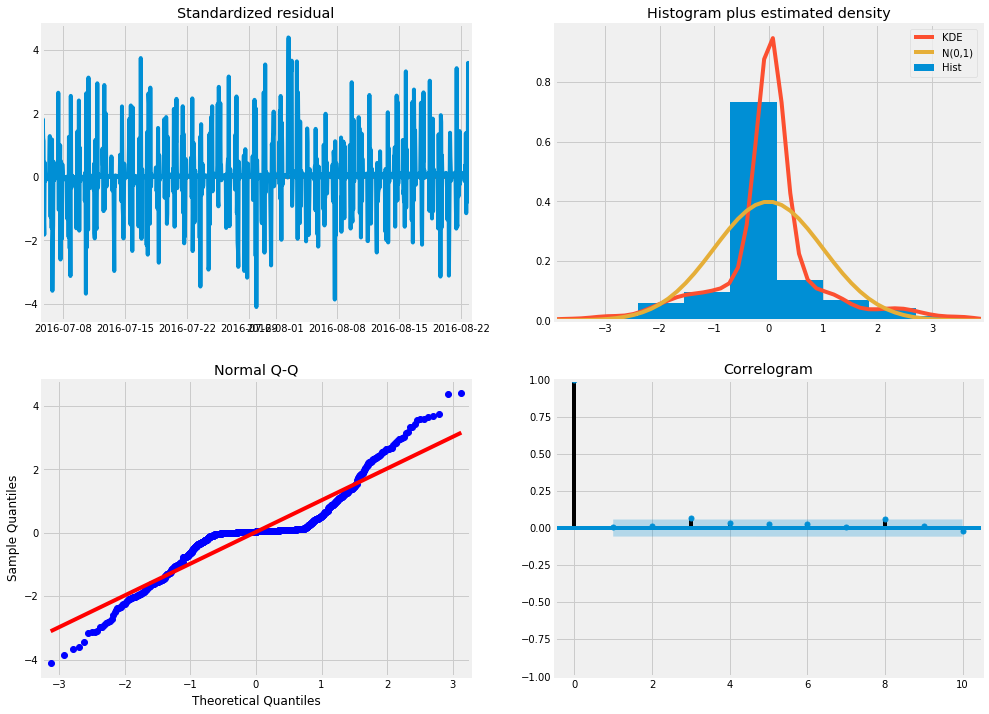

In [26]:
#run model diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#predict
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

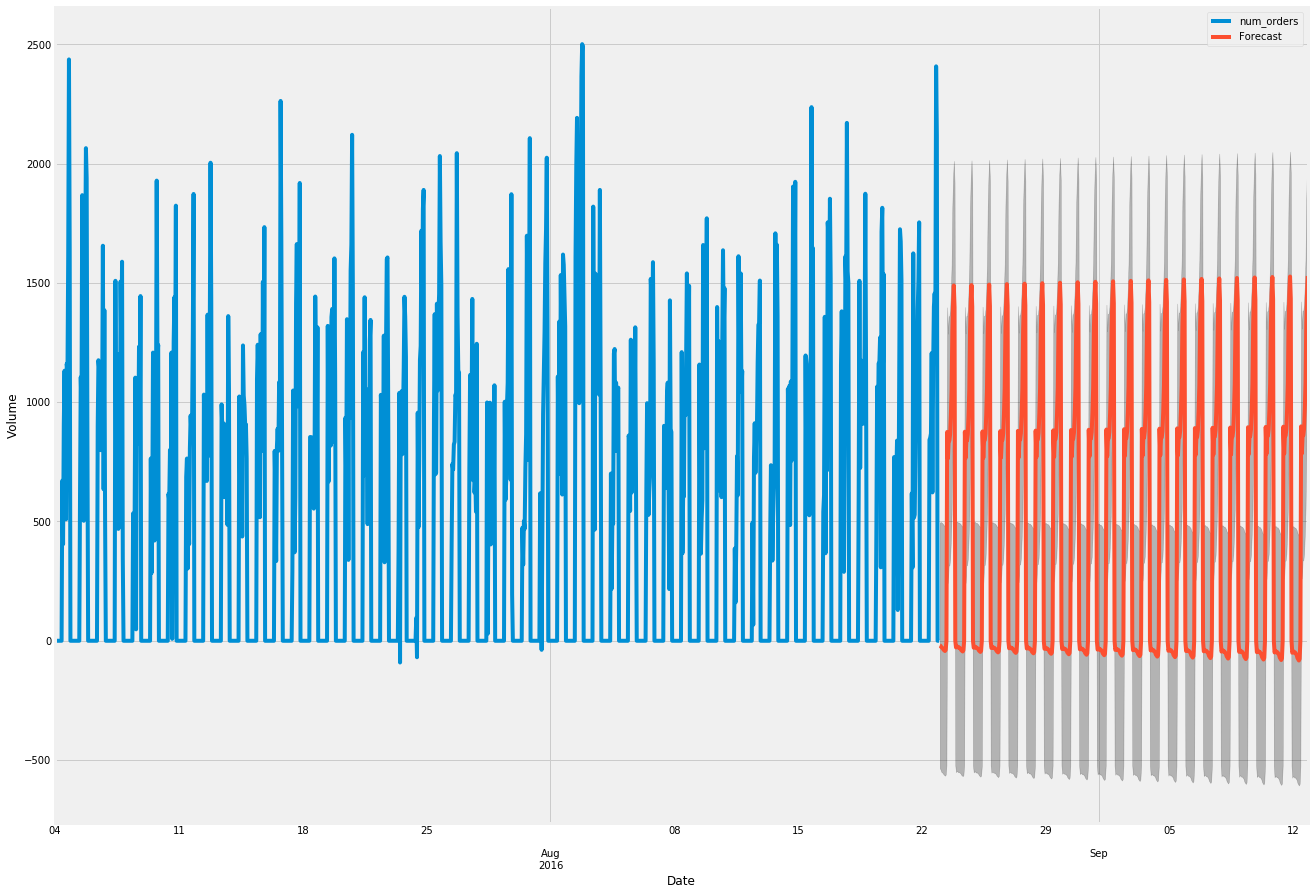

In [28]:
ax = data.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Volume')

plt.legend()
plt.show()

In [29]:
pred_uc.predicted_mean

2016-08-23 00:00:00     -19.538711
2016-08-23 01:00:00     -21.016840
2016-08-23 02:00:00     -26.279443
2016-08-23 03:00:00     -29.044817
2016-08-23 04:00:00     -31.620984
2016-08-23 05:00:00     -37.223423
2016-08-23 06:00:00     -39.803807
2016-08-23 07:00:00     -42.902182
2016-08-23 08:00:00     -38.398542
2016-08-23 09:00:00      -0.016636
2016-08-23 10:00:00     875.282613
2016-08-23 11:00:00     764.601181
2016-08-23 12:00:00     837.538811
2016-08-23 13:00:00     838.869399
2016-08-23 14:00:00     865.441574
2016-08-23 15:00:00     945.051589
2016-08-23 16:00:00    1052.363985
2016-08-23 17:00:00    1297.115632
2016-08-23 18:00:00    1419.052444
2016-08-23 19:00:00    1489.188400
2016-08-23 20:00:00    1398.361043
2016-08-23 21:00:00      -0.223978
2016-08-23 22:00:00     -27.949259
2016-08-23 23:00:00     -23.475217
2016-08-24 00:00:00     -24.566440
2016-08-24 01:00:00     -28.459130
2016-08-24 02:00:00     -27.408691
2016-08-24 03:00:00     -30.278383
2016-08-24 04:00:00 